# GOTO Stock Market Analysis

- **Nama:** Yosriko Rahmat Karoni Sabelekake
- **Email:** yosrikosabelekake@gmail.com
- **Id Dicoding:** yosriko

# Data Scraping

In [1]:
!pip install yfinance prophet pmdarima matplotlib pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 71.0 MB/s eta 0:00:00


# Mengunduh dan menyimpan data saham dengan format CSV

Mengunduh data saham GOTO dari Yahoo Finance untuk periode 2021-2024 dan menyimpannya ke file CSV (jika diperlukan). Ditampilkan juga head data

In [30]:
import yfinance as yf
import pandas as pd
from IPython.display import display

# Scraping data GOTO dari Yahoo Finance
data = yf.download("GOTO.JK", start="2021-01-01", end="2024-01-01")

# Menyimpan data ke dalam CSV (optional)
data.to_csv('goto_stock_data.csv')
data.columns = data.columns.get_level_values(0)
# Menampilkan data
print(data.head())
display(data)


[*********************100%***********************]  1 of 1 completed

Price                      Adj Close  Close   High    Low   Open      Volume
Date                                                                        
2022-04-11 00:00:00+00:00      382.0  382.0  416.0  372.0  400.0  9410897000
2022-04-12 00:00:00+00:00      370.0  370.0  442.0  360.0  422.0  3887331000
2022-04-13 00:00:00+00:00      374.0  374.0  380.0  360.0  370.0  3262811400
2022-04-14 00:00:00+00:00      376.0  376.0  382.0  374.0  374.0  3675981900
2022-04-18 00:00:00+00:00      378.0  378.0  380.0  370.0  376.0  2660312700


Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2022-04-11 00:00:00+00:00,382.0,382.0,416.0,372.0,400.0,9410897000
2022-04-12 00:00:00+00:00,370.0,370.0,442.0,360.0,422.0,3887331000
2022-04-13 00:00:00+00:00,374.0,374.0,380.0,360.0,370.0,3262811400
2022-04-14 00:00:00+00:00,376.0,376.0,382.0,374.0,374.0,3675981900
2022-04-18 00:00:00+00:00,378.0,378.0,380.0,370.0,376.0,2660312700
...,...,...,...,...,...,...
2023-12-21 00:00:00+00:00,88.0,88.0,89.0,86.0,88.0,1534795200
2023-12-22 00:00:00+00:00,86.0,86.0,90.0,86.0,90.0,1601574600
2023-12-27 00:00:00+00:00,85.0,85.0,88.0,85.0,86.0,1346276400


# Data Preparation

Data difokuskan hanya pada kolom tanggal dan harga penutupan dan resampled data untuk memastikan tanggal dalam bentuk harian

In [67]:
# Mengambil kolom tanggal dan harga penutupan (close)
df = data.reset_index()
df = df[['Date', 'Close']]

# Menampilkan data yang telah diproses
print(df.head())


Price                      Date  Close
0     2022-04-11 00:00:00+00:00  382.0
1     2022-04-12 00:00:00+00:00  370.0
2     2022-04-13 00:00:00+00:00  374.0
3     2022-04-14 00:00:00+00:00  376.0
4     2022-04-18 00:00:00+00:00  378.0


Handling Missing Data, jika tidak ada missing data maka tidak ada tindakan lanjutan

In [68]:
# Cek apakah ada missing values
missing_values = df.isnull().sum()

# Menampilkan hasil pengecekan missing values
print("Missing values per column:\n", missing_values)

Missing values per column:
 Price
Date     0
Close    0
dtype: int64


# First Model: Prophet

### Data preparation for Prophet


Mengubah format data sesuai dengan format Prophet


In [70]:
df_prophet = df.copy()
df_prophet.rename(columns={'Date':'ds', 'Close': 'y'}, inplace=True)

# Menampilkan data yang telah diproses
print(df_prophet.head())

Price                        ds      y
0     2022-04-11 00:00:00+00:00  382.0
1     2022-04-12 00:00:00+00:00  370.0
2     2022-04-13 00:00:00+00:00  374.0
3     2022-04-14 00:00:00+00:00  376.0
4     2022-04-18 00:00:00+00:00  378.0


Melakukan training dan visualisasi prediksi untuk model Prophet

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9zqou1qd/g65nswf1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9zqou1qd/tof93wlc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63485', 'data', 'file=/tmp/tmp9zqou1qd/g65nswf1.json', 'init=/tmp/tmp9zqou1qd/tof93wlc.json', 'output', 'file=/tmp/tmp9zqou1qd/prophet_modelxw3gfcf6/prophet_model-20241024092040.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:20:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:20:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


            ds       yhat  yhat_lower  yhat_upper
593 2024-06-22  85.725046   27.651813  143.385088
594 2024-06-23  85.608839   24.097942  142.104896
595 2024-06-24  59.989121    1.478261  118.708765
596 2024-06-25  58.746840   -1.430145  117.137997
597 2024-06-26  58.524374   -3.235087  120.379639


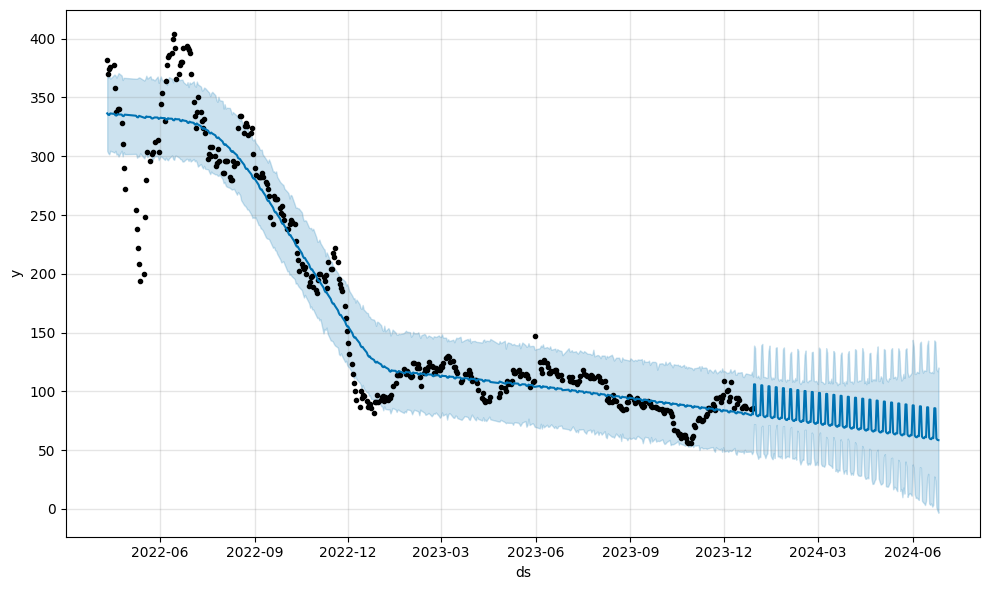

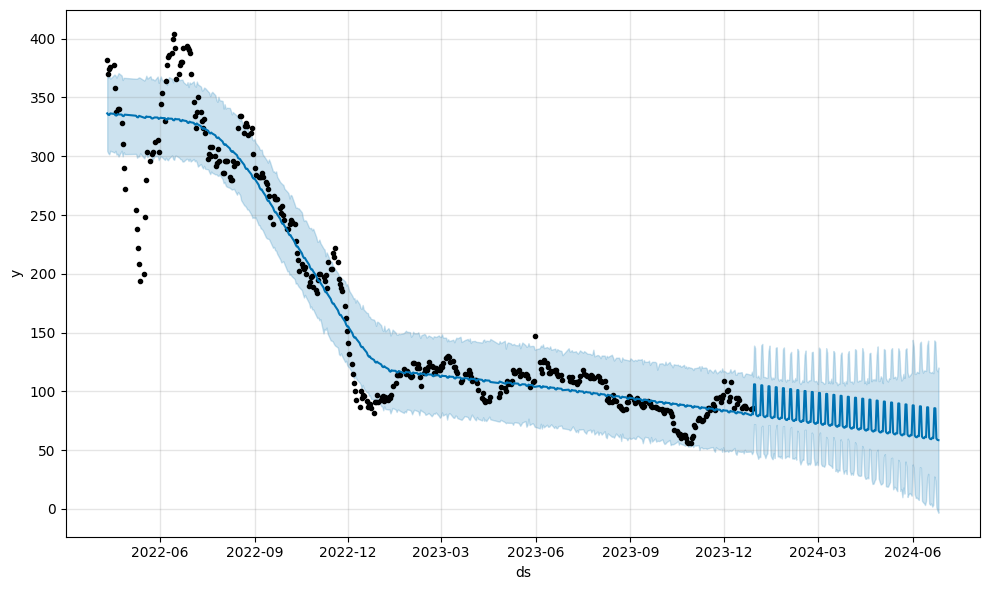

In [71]:
from prophet import Prophet

# Fit the Prophet model
model_prophet = Prophet()
df_prophet['ds'] = pd.to_datetime(df_prophet['ds']).dt.tz_localize(None)
# Train the model on the cleaned data
model_prophet.fit(df_prophet)

# Create a dataframe for future predictions (180 days)
future = model_prophet.make_future_dataframe(periods=180)

# Generate the forecast
forecast = model_prophet.predict(future)

# Display forecast results
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# Plot the forecast
model_prophet.plot(forecast)


# Second Model: ARIMA

Melatih model ARIMA untuk melakukan prediksi dan Visualisasi prediksi

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2939.749, Time=0.63 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2950.209, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2937.802, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2937.830, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2951.263, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2939.779, Time=0.32 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2940.889, Time=1.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2937.926, Time=0.04 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 2.443 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  418
Model:               SARIMAX(1, 1, 0)   Log Likelihood               -1465.901
Date:                Thu, 24 Oct 2024   AIC                           2937.802
Time:                        09:13:2

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


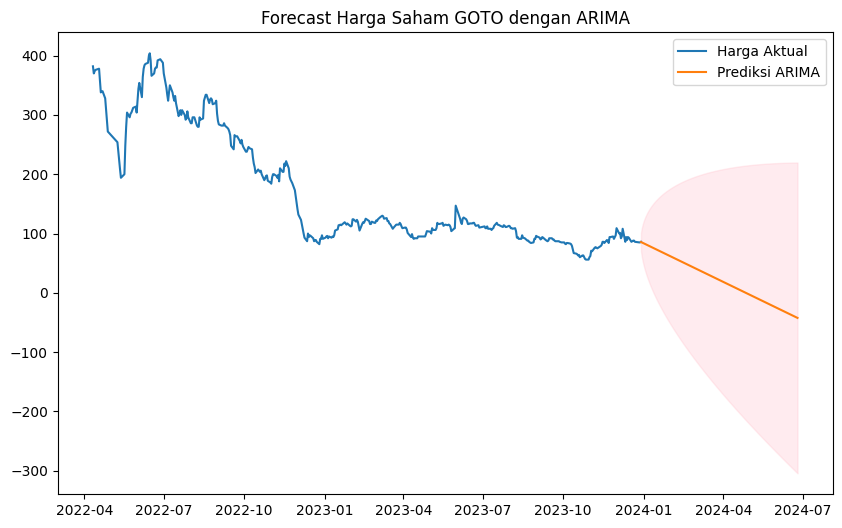

In [57]:
from pmdarima import auto_arima

# Menggunakan kolom 'Close' untuk ARIMA
df_arima = data['Close']

# Melatih model ARIMA secara otomatis
model_arima = auto_arima(df_arima, start_p=1, start_q=1,
                         test='adf',       # Augmented Dickey-Fuller Test
                         max_p=5, max_q=5, m=1,
                         d=None,           # Auto-define differencing
                         seasonal=False,   # No seasonality for simplicity
                         start_P=0, D=0, trace=True,
                         error_action='ignore',
                         suppress_warnings=True,
                         stepwise=True)

# Menampilkan ringkasan model
print(model_arima.summary())

# Membuat prediksi untuk 180 hari ke depan
n_periods = 180
forecast_arima, conf_int = model_arima.predict(n_periods=n_periods, return_conf_int=True)

# Plot hasil prediksi ARIMA
plt.figure(figsize=(10,6))
plt.plot(df_arima.index, df_arima, label='Harga Aktual')
plt.plot(pd.date_range(df_arima.index[-1], periods=n_periods, freq='D'), forecast_arima, label='Prediksi ARIMA')
plt.fill_between(pd.date_range(df_arima.index[-1], periods=n_periods, freq='D'),
                 conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.title('Forecast Harga Saham GOTO dengan ARIMA')
plt.show()


# Model Evaluation

Benchmarking model ARIMA dengan PROPHET menggunakan metrics MAE dan RMSE

In [72]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Evaluasi Model Prophet
y_true = df['Close'].values  # Data aktual
y_pred_prophet = forecast['yhat'][:len(df)].values  # Prediksi dari Prophet

mae_prophet = mean_absolute_error(y_true, y_pred_prophet)
rmse_prophet = np.sqrt(mean_squared_error(y_true, y_pred_prophet))

print(f"MAE Prophet: {mae_prophet}")
print(f"RMSE Prophet: {rmse_prophet}")

# Evaluasi Model ARIMA
y_pred_arima = model_arima.predict_in_sample()

mae_arima = mean_absolute_error(df_arima, y_pred_arima)
rmse_arima = np.sqrt(mean_squared_error(df_arima, y_pred_arima))

print(f"MAE ARIMA: {mae_arima}")
print(f"RMSE ARIMA: {rmse_arima}")


MAE Prophet: 17.6285819313176
RMSE Prophet: 25.876196885311575
MAE ARIMA: 6.105609482323135
RMSE ARIMA: 20.40746911530558
